In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
data=pd.read_csv('play_tennis.csv')

In [ ]:
display(data)

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
X = data.drop(['day', 'play'], axis=1)
y = data['play']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in X.columns:
    X[column] = le.fit_transform(X[column])
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11, 4)
(3, 4)
(11,)
(3,)


In [ ]:
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred=(tree.predict(X_test))
print(y_pred)

[1 1 0]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1 0]
 [0 2]]


In [ ]:
tree=DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=(tree.predict(X_test))
print(y_pred)

[1 1 0]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1 0]
 [0 2]]


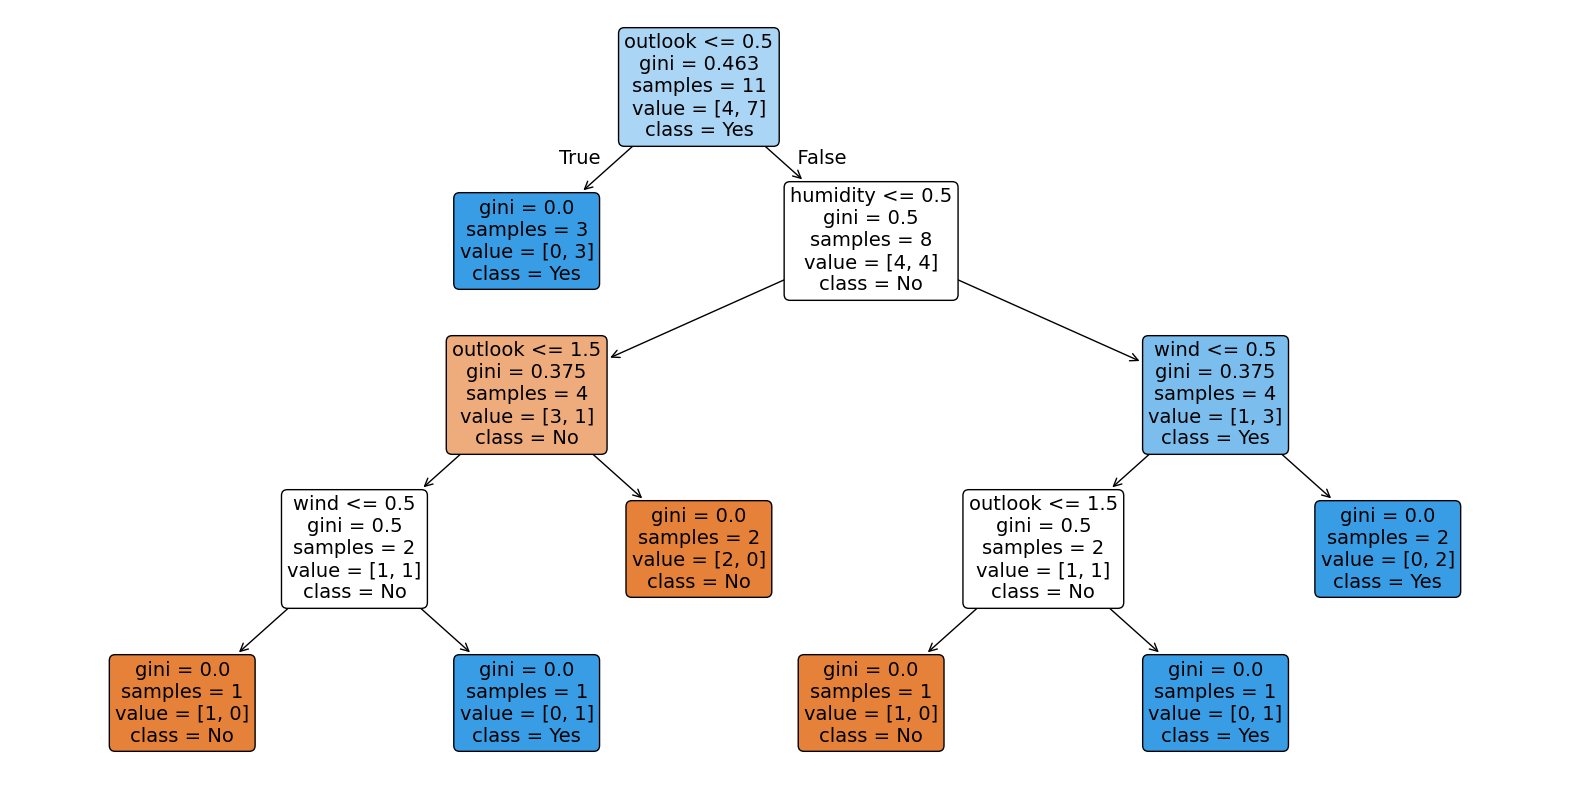

In [ ]:
## plotting
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=14)

# Save plot
plt.savefig('tennis_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()